# Classification using K-NN 

## Generating fake data

In [1]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.datasets.samples_generator import make_blobs
X_train, Y_train = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=6, random_state=11)

c:\users\shan\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
print(len(X_train))

300


## visualizing the generated data

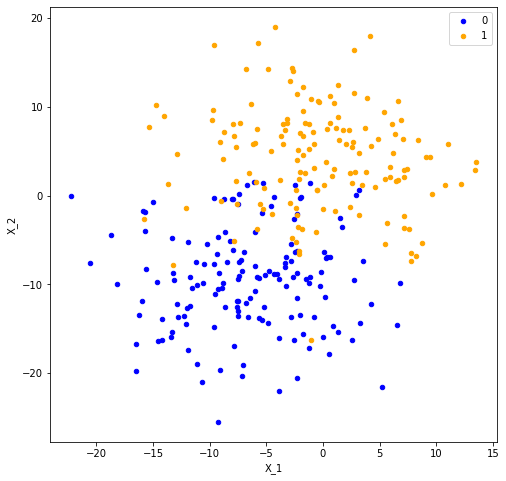

In [4]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame 

df = DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=Y_train))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots(figsize=(8,8))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

In [5]:
df

,x,y,label
0,-0.790665,5.852887,1
1,-14.227897,-16.327347,0
2,-7.025502,-19.114271,0
3,-0.554724,0.573737,1
4,-9.570838,-0.240273,0
...,...,...,...
295,-2.117618,-6.239289,1
296,-7.966373,-6.136669,0
297,5.474528,-5.486265,1
298,-7.463165,-13.054223,0


## feature scaling of the data. 

In [7]:
def normalize(X):
    x1_min = min(X_train[:,0])
    x1_max = max(X_train[:,0])
    
    f = lambda x: (x - x1_min)/(x1_max - x1_min)
    X[:,0] = f(X[:,0])

    x2_min = min(X_train[:,1])
    x2_max = max(X_train[:,1])
    
    f = lambda x: (x - x2_min)/(x2_max - x2_min)
    X[:,1] = f(X[:,1])
    
    return X


In [8]:
X = normalize(X_train)
print(X[0:5])

[[0.59987983 0.70438379]
 [0.22476575 0.2065585 ]
 [0.42582798 0.14400726]
 [0.60646637 0.58589566]
 [0.35477231 0.56762558]]


## The KNN function

In [15]:
def find_neighbors(k, X_tr, new_point):
    neighbor_arr = []
    for i in range(len(X_tr)):
        dist = np.sqrt(sum(np.square(X_tr[i]-new_point)))
        neighbor_arr.append([i, dist])
    neighbor_arr = sorted(neighbor_arr, key = lambda x : x[1])
    
    return neighbor_arr[0:k]

In [16]:
from collections import Counter
def classifier(neighbor_arr):
    class_arr = [Y_train[i[0]] for i in neighbor_arr]
    return Counter(class_arr).most_common(1)[0][0]

In [21]:
new_points = np.array([[-10, -10],
                      [0, -8],
                      [-15, 10],
                      [5, -2]])

In [23]:
new_points[1]

array([ 0, -8])

In [24]:
knn = find_neighbors(4, X, new_points[0])
classifier(knn)

0

# Regression using KNN

In [25]:
from sklearn.datasets.samples_generator import make_regression
X_train, Y_train = make_regression(n_samples=300, n_features=2, n_informative=2, noise=5, bias=30, random_state=200)

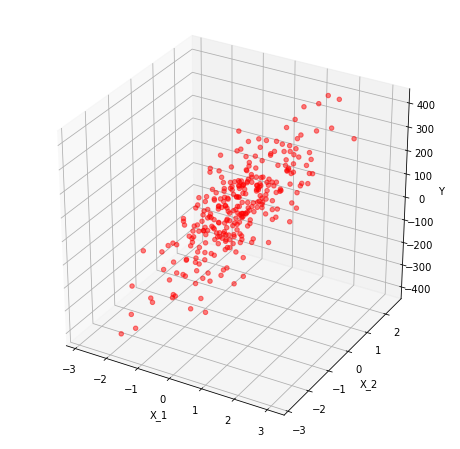

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0],X_train[:,1],Y_train, c = "red",alpha=.5, marker = 'o')
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Y')
plt.show()

In [28]:
def regressor(neighbor_arr):
    y_arr = [Y_train[i[0]] for i in neighbor_arr]
    avg_y = np.mean(y_arr)
    return avg_y

In [29]:
new_points = np.array([[-1, 1],
                      [0, 2],
                      [-3, -2],
                      [3, -3]])

knn = find_neighbors(3, X_train, new_points[1])
regressor(knn)

214.237541575631